# Setup

In [1]:
# Basic pacakges are imported for fundamental process.

import pandas as pd
import numpy as np
import scipy as sp
import sklearn

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree
import graphviz

from sklearn.metrics import accuracy_score,precision_score, recall_score

from matplotlib.colors import ListedColormap

## Load the Data

The data is obtained directly via url. Columns are named as are in the original dataset description because the dataset does not include column names.

In [2]:
url = r'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, header = None, 
                 names=["id","diagnosis","radius_mean",
                        "texture_mean","perimeter_mean","area_mean",
                        "smoothness_mean","compactness_mean","concavity_mean",
                        "concave_points_mean","symmetry_mean","fractal_dimension_mean",
                        "radius_se","texture_se","perimeter_se",
                        "area_se","smoothness_se","compactness_se",
                        "concavity_se","concave points_se","symmetry_se",
                        "fractal_dimension_se","radius_worst","texture_worst",
                        "perimeter_worst","area_worst","smoothness_worst",
                        "compactness_worst","concavity_worst","concave_points_worst",
                        "symmetry_worst","fractal_dimension_worst"]
                )

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# check "Not Applicable" data in the dataset
df.isnull().values.any()

False

In [4]:
# check the type of variables in df
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
# change the data type of "id" to string, because it serves as the key attribute to identify one instance without other meaning.
df['id'] = df['id'].apply(str)

# Data Preparation

In [10]:
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [7]:
# Retrieving Attributes
X = df.iloc[:, 2:33] # keep specific attributes 

# Retriving Target Variable
y = df.loc[:, "diagnosis"].replace({'B':0, 'M':1})

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42,
                                                    stratify = y)
print('The size of training set is ',X_train.shape,y_train.shape)  
print('The size of testing set is ',X_test.shape,y_test.shape) 

The size of training set is  (426, 30) (426,)
The size of testing set is  (143, 30) (143,)


# Grid Search + Cross Validation (fold = 10)

In [47]:
inner_cv = KFold(n_splits = 5, shuffle=True)
outer_cv = KFold(n_splits = 5, shuffle=True)

from sklearn.tree import DecisionTreeClassifier
# Choosing depth of the tree AND splitting criterion AND min_samples_leaf AND min_samples_split

gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                  param_grid = [{'criterion' : ['gini', 'entropy'],
                               'max_depth' : [2,3,4,5,6,7,8,9,None],
                               'min_samples_leaf' : [1,2,3,4,5,6,7,8,9],
                               'min_samples_split' : [2,3,4,5,6,7,8,9]
                                }],
                  scoring = 'f1_weighted', 
                  cv = inner_cv,
                  n_jobs = -1)

gs = gs.fit(X,y)
print("Parameter Tuning Decision Tree")
print("Non-nested CV f1 Score: ", gs.best_score_)
# Parameter setting that gave the best results on the hold out data.
print("Optimal Parameter: ", gs.best_params_)    
# Estimator that was chosen by the search, i.e. estimator which gave highest score
print("Optimal Estimator: ", gs.best_estimator_) 
nested_score_gs = cross_val_score(gs, X = X, y = y, cv = outer_cv)
print("Nested CV f1 Score: ",nested_score_gs.mean(), " +/- ", nested_score_gs.std())

Parameter Tuning Decision Tree
Non-nested CV f1 Score:  0.9576841091924265
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=42)
Nested CV f1 Score:  0.9400724160975946  +/-  0.02038080911313938


# Fitting Graph

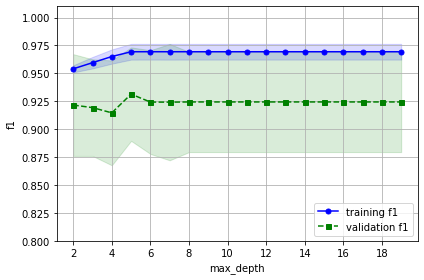

In [43]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

np.random.seed(42)

max_depth = range(2,20,1)
param_name = "max_depth"
param_range = max_depth

DTmodel = tree.DecisionTreeClassifier(criterion = 'gini',  
                                      min_samples_leaf = 6,
                                      min_samples_split = 2,
                                      random_state = 42
                                     )  

# Determine training and test scores for varying parameter values.
train_scores, test_scores = validation_curve( 
                DTmodel, 
                X = X_train, 
                y = y_train, 
                param_name = param_name, 
                param_range = param_range,
                cv = 10,     #10-fold cross-validation
                scoring = 'f1_weighted',
                n_jobs = -1
) # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. 
# This parameter is ignored when the ``solver``is set to ‘liblinear’ 
# regardless of whether ‘multi_class’ is specified or not. 
# If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training f1')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation f1')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.ylim([0.8, 1.01]) # y limits in the plot

from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure


# ROC curve

In [44]:
from sklearn import metrics
from sklearn.metrics import roc_curve

ROC AUC: 0.96 (+/- 0.03)


Text(0, 0.5, 'True positive rate (TPR)')

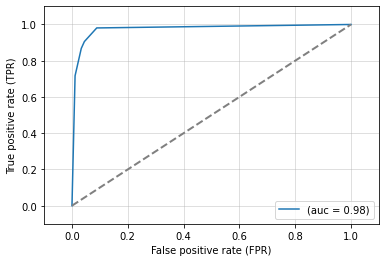

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score


scores = cross_val_score(estimator = DTmodel,  #Estimate AUC based on cross validation
                             X = X,
                             y = y,
                             cv = 10,
                             scoring='roc_auc',
                        n_jobs = -1)

print("ROC AUC: %0.2f (+/- %0.2f)" #Print peformance statistics based on cross-validation
      % (scores.mean(), scores.std()))


#y_test_pred = DT_best.predict(y_test)
y_pred = DTmodel.fit(X_train, y_train).predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_true = y_test, # Build ROC curve
                                 y_score = y_pred)
roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
         linestyle = '-',
         label='(auc = %0.2f)' % (roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
